In [1]:
#各ライブラリのインポート
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import codecs as cd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, confusion_matrix
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler #preprocessing：前処理  StandardScaler：標準化
from sklearn.model_selection import train_test_split #データを訓練データとテストデータに分割する
from sklearn.linear_model import SGDClassifier #クラス分類をする
from sklearn.metrics import log_loss, accuracy_score, precision_recall_fscore_support, confusion_matrix 
#log_loss：対数尤度 ,accuracy_score：正答率 ,precision_recall_fscore_support：適合率,再現率,F1値 ,confusion_matrix：クロス集計表
from sklearn.metrics import mean_absolute_error #平均絶対誤差
import datetime as dt #日時を扱う

In [2]:
os.chdir("C:\Anaconda3\envs\skillupai\Dataset")#読み込むデータのパスを指定
ds=pd.read_csv("Kaggle_SkillupAI.csv", engine="python")#CSVファイルの読み込み
display(ds.head())#上位10行の確認表示

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
ds_fir=ds.loc[:,["state", "backers", "goal"]]
display(ds_fir.head())#データ抽出の確認
display(ds_fir.isnull().sum())#欠損項目の確認

,state,backers,goal
0,failed,0,1000.0
1,failed,15,30000.0
2,failed,3,45000.0
3,failed,1,5000.0
4,canceled,14,19500.0


state      0
backers    0
goal       0
dtype: int64

In [4]:
ds_fir['state'].value_counts()#事業のステータスの確認

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [5]:
ds_suc=ds_fir[ds_fir['state']=='successful']#成功した事業のデータセットのみを抽出
display(ds_suc.head())
ds_not=ds_fir[(ds_fir['state']=='failed')]#成功していない事業のデータセットを抽出
display(ds_not.head())

,state,backers,goal
5,successful,224,50000.0
6,successful,16,1000.0
11,successful,100,12500.0
14,successful,761,5000.0
18,successful,7,250.0


,state,backers,goal
0,failed,0,1000.0
1,failed,15,30000.0
2,failed,3,45000.0
3,failed,1,5000.0
7,failed,40,25000.0


In [6]:
ds_sum=pd.concat([ds_suc, ds_not])#データの結合
ds_sum['state'].value_counts()#データの内容確認

failed        197719
successful    133956
Name: state, dtype: int64

In [7]:
#四分位範囲外の外れ値を除外
col1=ds_sum.iloc[:, 1]

q1 = col1.describe()['25%']
q3 = col1.describe()['75%']
iqr=q3-q1

outlier_min1 = q1 - (iqr) * 1.5
outlier_max1 = q3 + (iqr) * 1.5

col1[col1 < outlier_min1] = None
col1[col1 > outlier_max1] = None

col2=ds_sum.iloc[:, 2]

q1 = col2.describe()['25%']
q3 = col2.describe()['75%']
iqr=q3-q1

outlier_min2 = q1 - (iqr) * 1.5
outlier_max2 = q3 + (iqr) * 1.5

col2[col2 < outlier_min2] = None
col2[col2 > outlier_max2] = None

ds_sum.iloc[:,1]=col1
ds_sum.iloc[:,2]=col2

display(ds_sum.isnull().sum())#欠損項目の確認

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be

state          0
backers    38970
goal       40872
dtype: int64

In [8]:
ds_sum = ds_sum.dropna(how='any')#欠損値のある行の削除
display(ds_sum.isnull().sum())#欠損値のある行が削除されたことの確認
print(len(ds_sum))

state      0
backers    0
goal       0
dtype: int64

260064


In [9]:
ds_suc=ds_sum[ds_sum['state']=='successful']#成功した事業のデータセットのみを抽出
display(ds_suc.head())
ds_not=ds_sum[(ds_sum['state']=='failed')]#成功していない事業のデータセットを抽出
display(ds_not.head())
print(ds_suc)
print(ds_not)

,state,backers,goal
6,successful,16.0,1000.0
11,successful,100.0,12500.0
18,successful,7.0,250.0
24,successful,66.0,175.0
25,successful,147.0,10000.0


,state,backers,goal
0,failed,0.0,1000.0
1,failed,15.0,30000.0
3,failed,1.0,5000.0
7,failed,40.0,25000.0
10,failed,0.0,2500.0


             state  backers     goal
6       successful     16.0   1000.0
11      successful    100.0  12500.0
18      successful      7.0    250.0
24      successful     66.0    175.0
25      successful    147.0  10000.0
28      successful     27.0    100.0
32      successful     18.0   2000.0
34      successful     92.0  12000.0
41      successful     34.0   2100.0
47      successful    154.0   8000.0
53      successful     71.0   4000.0
54      successful     51.0  11000.0
57      successful    121.0   9500.0
66      successful    144.0  15000.0
72      successful     95.0   4000.0
82      successful     29.0   4000.0
83      successful     31.0    500.0
84      successful     36.0    500.0
85      successful    153.0   4000.0
92      successful     40.0   2000.0
94      successful    113.0  10000.0
95      successful     29.0   1500.0
96      successful     52.0   3000.0
97      successful     45.0   2000.0
100     successful      8.0    500.0
101     successful     14.0    200.0
1

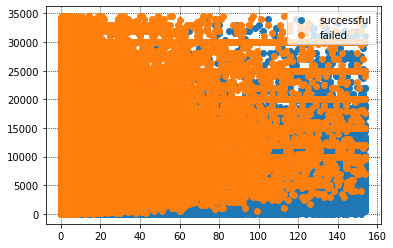

In [10]:
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(ds_suc.iloc[:, 1], ds_suc.iloc[:, 2], 'o', color='C0', label='successful')
plt.plot(ds_not.iloc[:, 1], ds_not.iloc[:, 2], 'o', color='C1', label='failed')
plt.legend(loc='best')
plt.show()

In [11]:
y = ds_sum["state"].values
X = ds_sum.drop('state', axis=1).values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234, tol=1e-3)
clf.fit(X, y)
print(X)

# 重みを取得して表示
w0 = clf.intercept_[0]
w1 = clf.coef_[0, 0]
w2 = clf.coef_[0, 1]
print('w0 = {:.3f}, w1 = {:.3f}, w2 ={:.2f}'.format(w0, w1, w2))

[[1.60e+01 1.00e+03]
 [1.00e+02 1.25e+04]
 [7.00e+00 2.50e+02]
 ...
 [1.00e+00 1.50e+04]
 [6.00e+00 1.50e+04]
 [1.70e+01 2.00e+03]]
w0 = -3917.089, w1 = 170666.381, w2 =-884.42


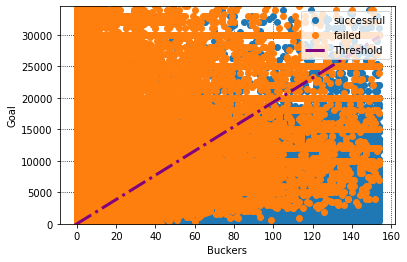

In [12]:
plt.grid(which='major',color='black',linestyle=':')
plt.grid(which='minor',color='black',linestyle=':')
plt.plot(ds_suc.iloc[:, 1], ds_suc.iloc[:, 2], 'o', color='C0', label='successful')
plt.plot(ds_not.iloc[:, 1], ds_not.iloc[:, 2], 'o', color='C1', label='failed')
# 境界線をプロットして表示
# 紫：境界線
x1, x2 = X[:, 0], X[:, 1]
line_x = np.arange(np.min(x1) - 1, np.max(x1) + 1)
line_y = - line_x * w1 / w2 - w0 / w2
plt.plot(line_x, line_y, linestyle='-.', linewidth=3, color='purple', label='Threshold')
plt.ylim([np.min(x2) - 1, np.max(x2) + 1])
plt.legend(loc='best')

plt.xlabel("Buckers")
plt.ylabel("Goal")
plt.show()

In [13]:
# ラベルを予測
y_est = clf.predict(X)

# 対数尤度を表示
print('対数尤度 = {:.3f}'.format(- log_loss(y, y_est)))

# 正答率を表示
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y, y_est)))

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:532: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


TypeError: ufunc 'minimum' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

In [ ]:
# 予測値と正解のクロス集計
conf_mat = pd.DataFrame(confusion_matrix(y, y_est), 
                        index=['正解 = successful', '正解 = failed'], 
                        columns=['予測 = successful', '予測 = failed'])
conf_mat